In [1]:
medical_charges_url = "https://github.com/stedy/Machine-Learning-with-R-datasets/tree/d20658ec6d336af2d4ddb5fd72b6f677dd46136e"

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url, "medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x2ac320a0b90>)

In [5]:
import pandas as pd
medical_df = pd.read_csv("Downloads/insurance.csv")
medical_df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
medical_df.describe()


age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

## data satistics ##
The ranges of the values in numerical columns seem reasonable(no negative ages)
The "charges' column seems properly skewed however, as the median (50 percentile) is much lower
compared to max.

## data types ##
the data seems to contain numerical and categorical datatypes

In [2]:
medical_df 

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

## briefs ##
1. The dataset contains 1338 rows and 7 columns
2. Our Objective is to estimate the value in the "charges", column using the values of
other columns.If we can d  so for the historical data the we be able to estimate charges
                             for new customers, simply by asking for information like age, sex
    bmi, no.of children and smoking habits and region.
3.


## Exploratory data Analysis ##
1. We explore the data by visualizing the distribution of vallues in some columns of the 
dataset, and the relationships between "charges", and other columns.
2. We shall use Matplotlib, seaborn, and plotly for visualization.

In [3]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
##ENSURES FIGURES ARE NNOT POPUPS



Putting up some setting for the figures used 

In [4]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

# Age 
1. Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64
Thus we can visualize the distribution of the age using a histogram with 47 bins(one for each year)
AND A BOX PLOT.
Plotly is used to make the chart interactive, but you can create similar charts using seaborn


In [10]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

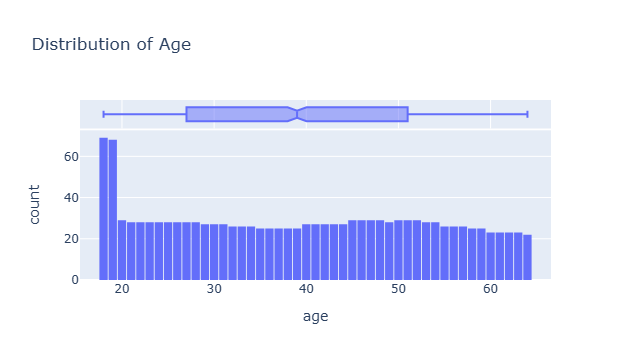

In [17]:
fig = px.histogram(medical_df, x = "age", marginal = "box", nbins = 47, title = 
                   "Distribution of Age")
fig.update_layout(bargap  = 0.1)
fig.show()
#putting the margina = "box" tells plotly to plot a boxplot above the histogram                

The distribution of age in the dataset is almost uniform, with 20-30 customers ata every age except at ages 18 and 19, which seem to have as twice as many customers as other ages.The uniform distribution may arise due to the fact that there isnt a big variation in the number of people at any given age (btwn 18 nd 64) in the US. 
The high number of customers maybe due to the fact that the age reuirement to obtain insurence from this company is 18 hence students apply for the insurance once they attain 18yrs of age.


## Body Mass Index ##
Lets see the distribution of BMI of customers, using   a histogram and boxplot

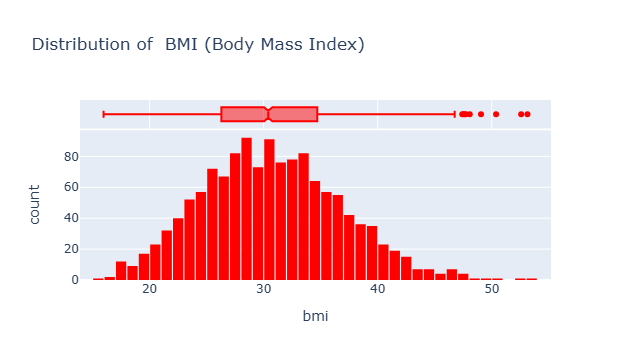

In [16]:
fig = px.histogram(medical_df, x = "bmi", marginal = "box", color_discrete_sequence = ["red"],
      title ="Distribution of  BMI (Body Mass Index)")
fig.update_layout(bargap = 0.1)  
fig.show()
#it shows a gaussisan distribution...where most values ARE CONCENTRATED AROUND 30 

## Interpreting BMI 
<18.5 ...UNDERWEIGHT
18.5-24.9...Normal Weight
25-29.9....Overweight
30-39.9..... obese
40> morbid..... obesity


## Charges ##
Lets Visualize the charges distribution i.e, the annual medical charges foor customers.
This is the column we aree trying to predict.Lets also use the categorical column Smoker to distinguish the charges for smokers and non-smokers

C:\Users\USER\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



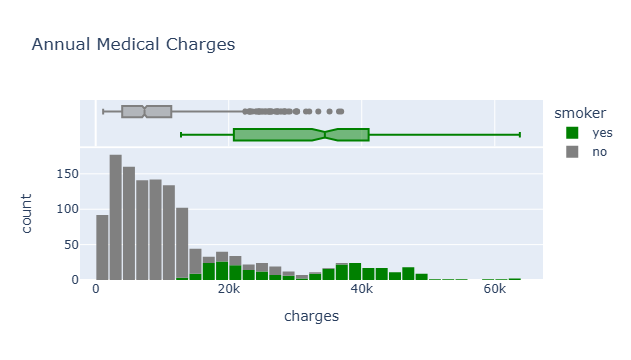

In [17]:
fig = px.histogram (medical_df , x ="charges", marginal = "box", color = "smoker",
                    color_discrete_sequence = ["green", "grey"], title = "Annual Medical Charges")
fig.update_layout (bargap = 0.1)
fig.show()

We can make the following observations
1. For most customers, the annual medical charges are under $10,000, its only a small fration
of customers that has higher medical expenses, possibly due to accidents, major illness and
genetic diseases. The distribution follows a power law.
2. There is  significant difference in medical expenses between smokers and non-smokers 
 while the median for non-smokers is  $7300, the median for smokers is close to $35,000

Visualize the distribution of medical charges in connection with other factors like "sex", and 
"region". What do you observe?

C:\Users\USER\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



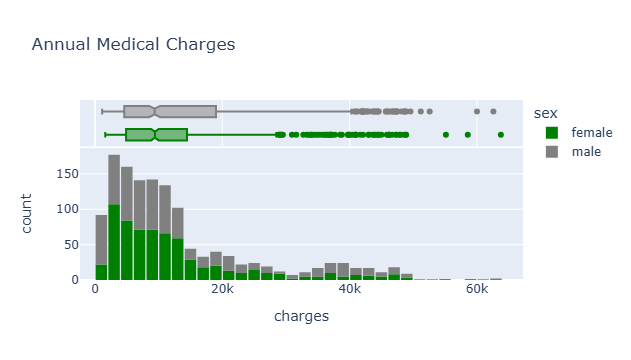

In [18]:
fig = px.histogram (medical_df , x ="charges", marginal = "box", color = "sex",
                    color_discrete_sequence = ["green", "grey"], title = "Annual Medical Charges")
fig.update_layout (bargap = 0.1)
fig.show()

The median of charges for men seems to be slightly lower than the median of charges for 
woomen. Most of the population spends below 20k on healtth charges this could be attributed 
to most people being non-smkers and fewer people in the population having chronic illnesses


C:\Users\USER\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



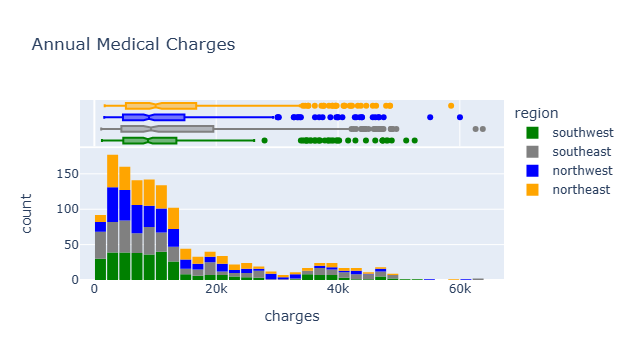

In [25]:
fig = px.histogram (medical_df , x ="charges", marginal = "box", color = 'region',
                    color_discrete_sequence = ["green", "grey", "blue", "orange"], title = "Annual Medical Charges")
fig.update_layout (bargap = 0.1)
fig.show()

People in the northeast are have a higher spending on health charges compared to people in
other regions.THIS COULD BE DUE TO THE FACT THat most people are smokers or most people suffer 
from chronic illnesses.

## Smoker ##
Lets visualize the distribution of the "smoker" coluumn (containing values "yes",, and "no"
using a histogram.


In [28]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

C:\Users\USER\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



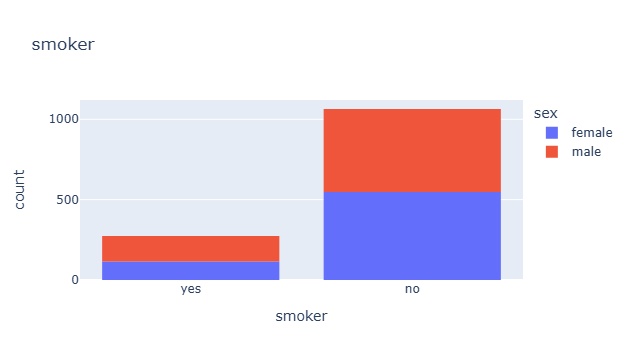

In [35]:
px.histogram (medical_df, x = "smoker", color = "sex", title = "smoker")

It appears about 20% of the customers have reported that they smoke.Can You verify
whether this matxhes the national average, assumintg the data was collected in 2010?
We can also see that smoking appears to be more common among males.


In [31]:
## Visualize the distribution of "sex", "region", and children columns and make a report
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [32]:
medical_df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

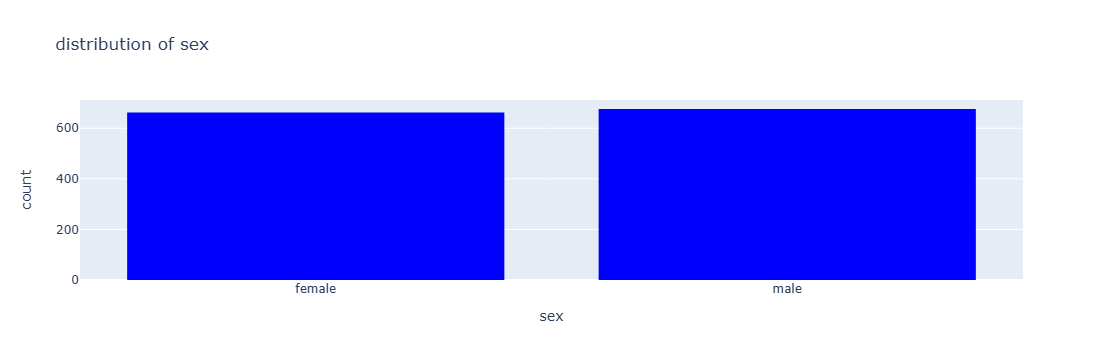

In [46]:
px.histogram( medical_df, x = "sex", color_discrete_sequence = [ "blue"],title = "distribution of sex")

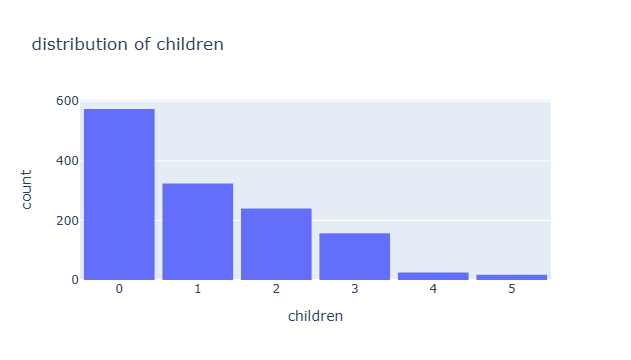

In [45]:
fig = px.histogram(medical_df, x = "children", title = "distribution of children")
fig.update_layout(bargap = 0.1)
fig.show()

The reduction in number of children as their age advances , can be attributed to 
a high mortality rate or ability to  register a child as a beneficiary past 2 or 3yrs of age,
or a high cost of insurance for children since they are  more susceptible to diseases.


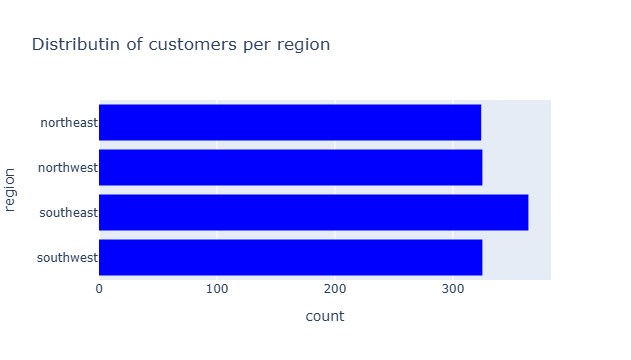

In [50]:
px.histogram(medical_df, y = "region", color_discrete_sequence = ["blue"], title = "Distributin of customers per region")

## Age and Charges ##
Lets visualize the relationship between "age", and "charges", using a scatter plot. Each point
in the scatter  plot represents one customer. We'll also  use vvalues in the "smoker"
column to color the points

C:\Users\USER\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



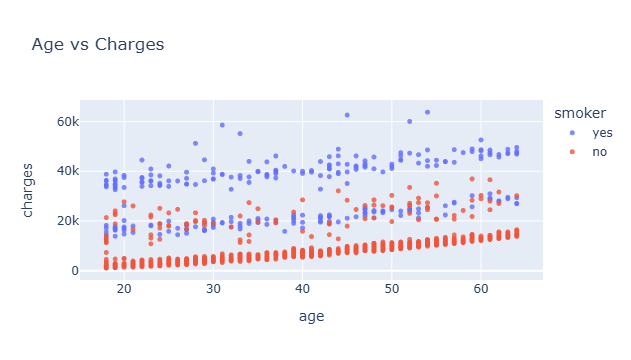

In [53]:
fig = px.scatter(medical_df, x ="age", y = "charges", color = "smoker", opacity = 0.8, 
                 hover_data = ["sex"], title = "Age vs Charges")
fig.update_traces( marker_size = 5)
fig.show()

We can observe the following
1.The general trend seems to be that medical charges increase witth age , as we might expect
.However there is a significant variation at every age, and its clear that age alone cannot be used
to accurately determine medical charges.
2. We can see thrree ckusters of points , each of which seems to form a line with an increasing slope
 . The first and and largest cluster consists primary of presumably "healthy-non-smokers"
    who have relatively low medical charges compared to others.
    . The second cluster contains contains a mix of smokers and "non-smokers", with medical "issues",
      and smokers without major medical issues.
  . The final cluster consists exclusively of smokers, presumably smokers with major medical issues
    that are possibly related to worsened smoking.

More Insights
-The charges increases as age increases for both smokers and non-smokers

## BMI and Charges ##
Let's visualize the relationship between BMI and Charges using another scatter plot.
Once again we'll use the values from the "smoker" column to color the points


C:\Users\USER\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



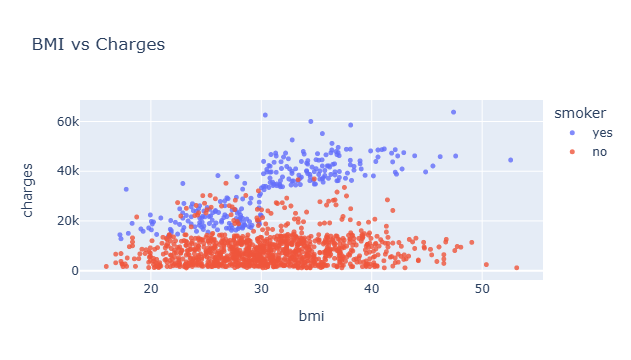

In [55]:
fig = px.scatter (medical_df, x = "bmi", y = "charges", color = "smoker", opacity = 0.8,
                  hover_data = ["sex"], title = "BMI vs Charges")
fig.update_traces (marker_size = 5)
fig.show()
                  

It appears that for non-smokers, an increase in BMI  doesn't seem to be related to an increase 
in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI
greater than 30.


What other insights can you gather from the above graph?
Charges for non-smokers do not exceed 40k while for smokers with BMI above 30, the chrges
exceed 40k


 ## Excercise: 
 Create some graphs to  visualize how the "charges" column is related 
to other columns ("Children", "sex", "region", and "smoker").
Summarize the insights gathered from these graphs.

HINT:Use violin plots(px.violin) and barplots(sns.barplots)

In [56]:
help(px.violin)

Help on function violin in module plotly.express._chart_types:

violin(data_frame=None, x=None, y=None, color=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, orientation=None, violinmode=None, log_x=False, log_y=False, range_x=None, range_y=None, points=None, box=False, title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure
        In a violin plot, rows of `data_frame` are grouped together into a
        curved mark to visualize their distribution.
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        This argument needs to be passed for column names (and not keyword
        names) to be used. Array-like and dict are tranformed internally to a
        pandas DataFrame. Optio

C:\Users\USER\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



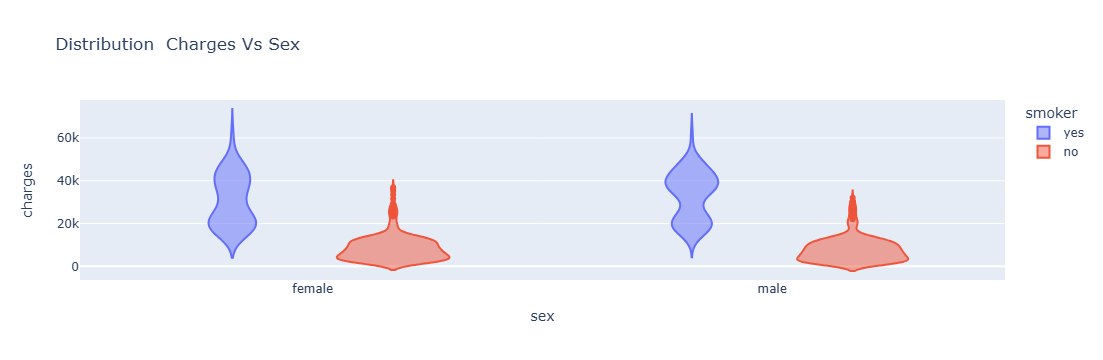

In [67]:
px.violin(medical_df,  x = "sex", y = "charges" ,color = "smoker", title = 
          "Distribution  Charges Vs Sex")
          

Male smokers seem to spend alot of mon copared to frmale non-smokers

<Axes: xlabel='sex', ylabel='charges'>

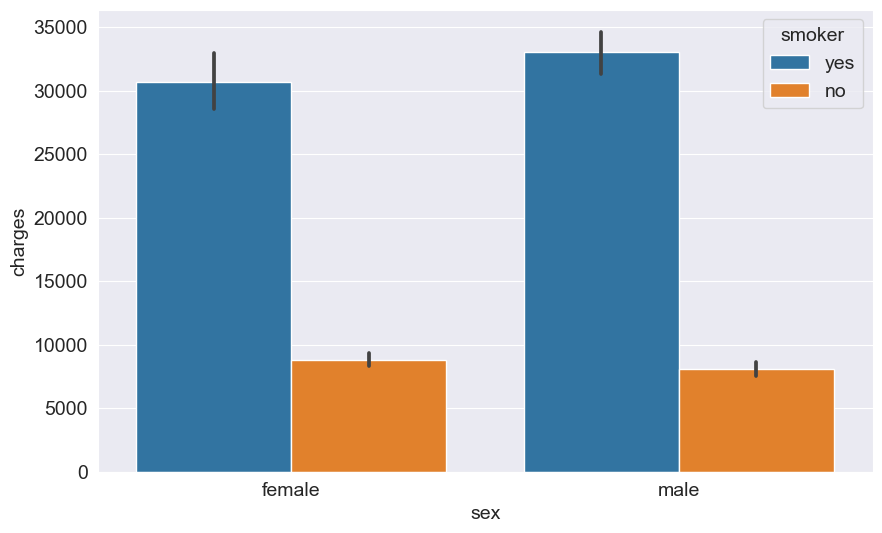

In [66]:
sns.barplot(medical_df,  x = "sex", y = "charges" ,hue = "smoker")
#fig.label( "Distribution  Charges Vs Sex")
#fig.show()


<Axes: xlabel='children', ylabel='charges'>

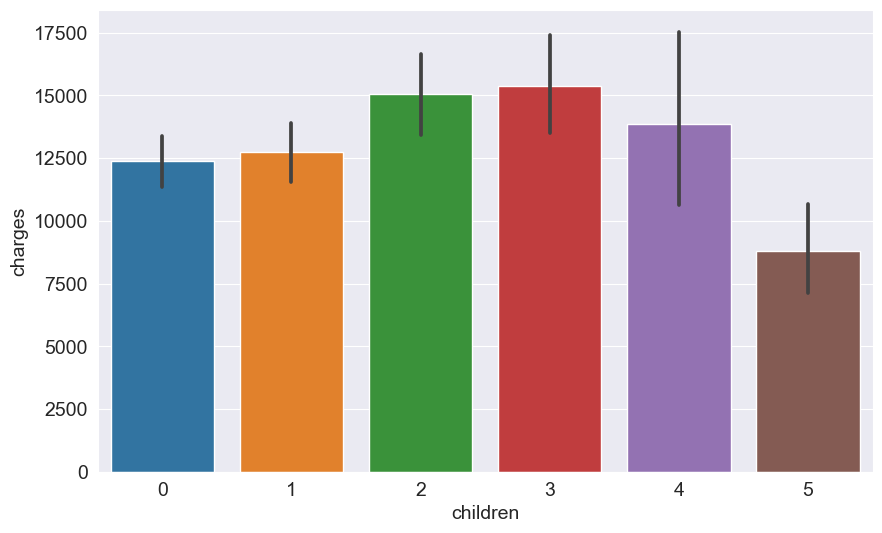

In [69]:
sns.barplot(medical_df,  x = "children", y = "charges" )

Medical charges follow a gaussian ditribution.


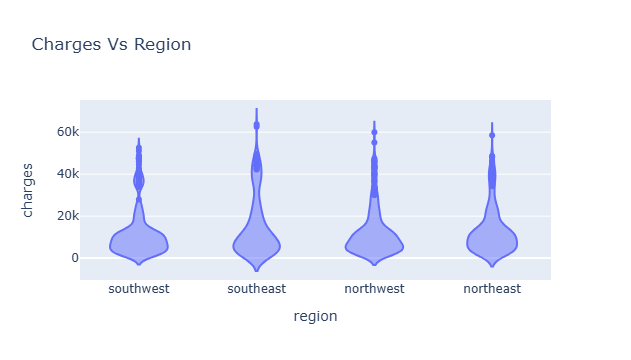

In [76]:
px.violin(medical_df,  x = "region", y = "charges", title = "Charges Vs Region")

<Axes: xlabel='smoker', ylabel='charges'>

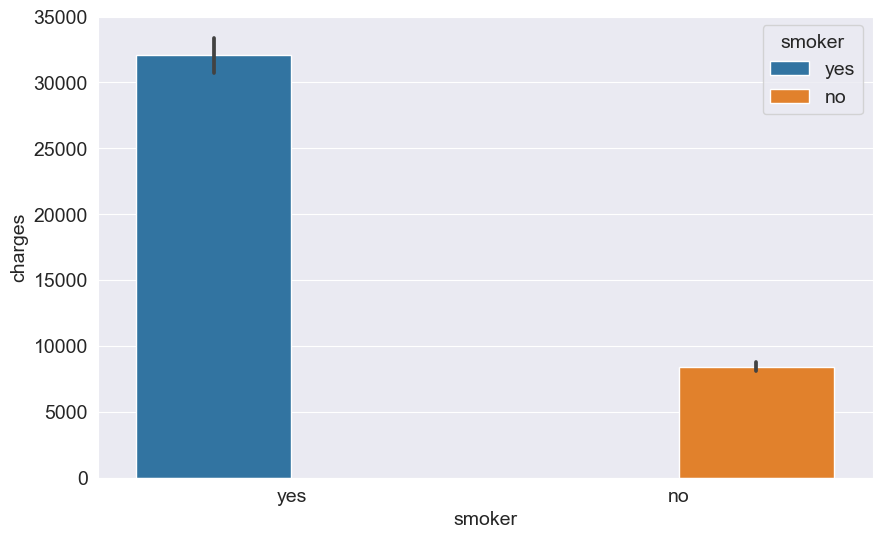

In [77]:
sns.barplot(medical_df,  x = "smoker", y = "charges" ,hue = "smoker")

The aggregate charges for smokers are slightly high

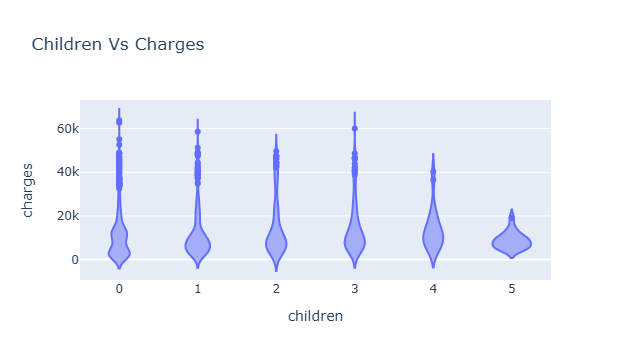

In [78]:
px.violin(medical_df,  x = "children", y = "charges" , title = "Children Vs Charges")

## Correlation ##
As you can tell from the analysis, the values in some columns are more closeltyy related to
the values in "charges", compared to other columns E.g, "age", and "charges" seem to grow
together whereas "bmi" and "charges" do not.

This relationship is expressed numerically using a measure known as correlation coefficient
using the .corr method of a pandas series.

<Axes: >

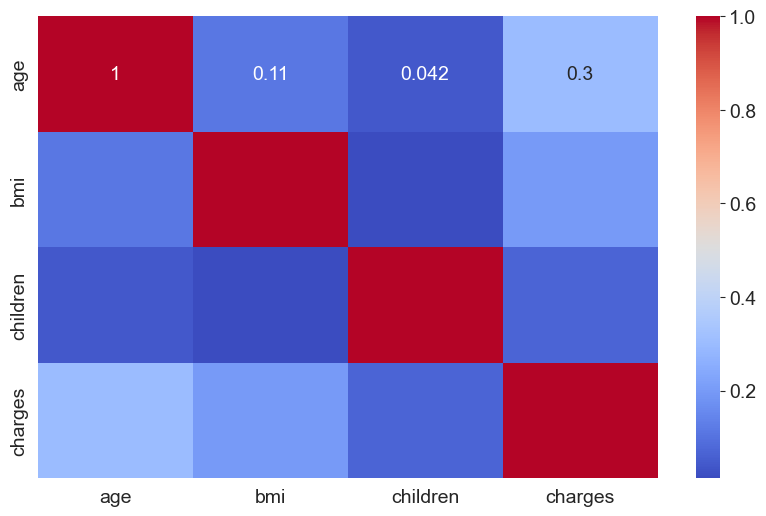

In [89]:
sns.heatmap(medical_df.select_dtypes (include = "number"). corr(), cmap = "coolwarm", annot = True)

In [90]:
medical_df.charges.corr(medical_df.age)

0.2990081933306477

In [91]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [92]:
medical_df.charges.corr(medical_df.children)

0.06799822684790482

To compute the correlation for categorical columns, they must be converted into columns

In [6]:
smoker_values = { "no" : 0, "yes" : 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984773

In [5]:
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

## Interpretation corr coefficient ##
##Strength: The greater values of -1 and 1 indicates a perfectly linear relationship where
a chane in one variable is accompanied by a perfect consist change in the other. For those
relationships, all of the data points fall on a line. In practice, such trelationships do not
exist.
A coefficient o zero represents no linear relationship. As one variable increases, there is 
no tendency of the other tto increase or decrease.
when the value is between -1 and 1, there is a relationship but the values do nopt align
.As the relationship approaches -1 or 1, strength of the relationship increases
and data points tend to fall in line.

## Direction
    The sign of the correlation is an indicator of the direction of the relationship

In [6]:
medical_df.select_dtypes(include = "number").corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

Text(0.5, 1.0, 'correlation matrix')

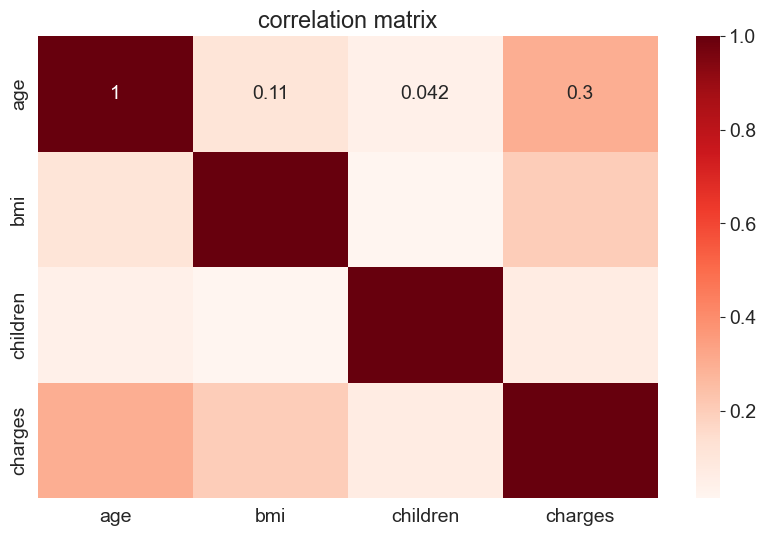

In [7]:
sns.heatmap(medical_df.select_dtypes(include = "number").corr(), cmap = "Reds",annot = True)
plt.title("correlation matrix")

## Correlation Coefficient Vs Causation Fallacy :
Note that a high correlation cannot be used to interpret a cause-effect relationship betwee
n features.Two Features Xand Y can be correlated if X causes Y or if Y causes X
or if both are caused independently by some other factor z, and the correlation will
nolonger hold true if one of the cause-effect relationships is broken.It's also possible that X and Y simply apperar to be correlated because the sample is small.
While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated sysytem can often have major consequences on society, so its important to study why automated sysytems lead to a given result.
Determining cause-effect relationships requires human insigt.


## Linear Regression Using a Single Feature 
We knoew that the "smoker", and "age" column have the strongest correlation with "charges",. Lets try find a way of Estimation the value o "Charges", using the value of "age", for non-smokers.
First lets create a data frame for non-smokers only

In [7]:
non_smoker_df = medical_df [medical_df.smoker == "no"]



visualizing the relationship between age and charges

<Axes: title={'center': 'Age Vs Charges'}, xlabel='age', ylabel='charges'>

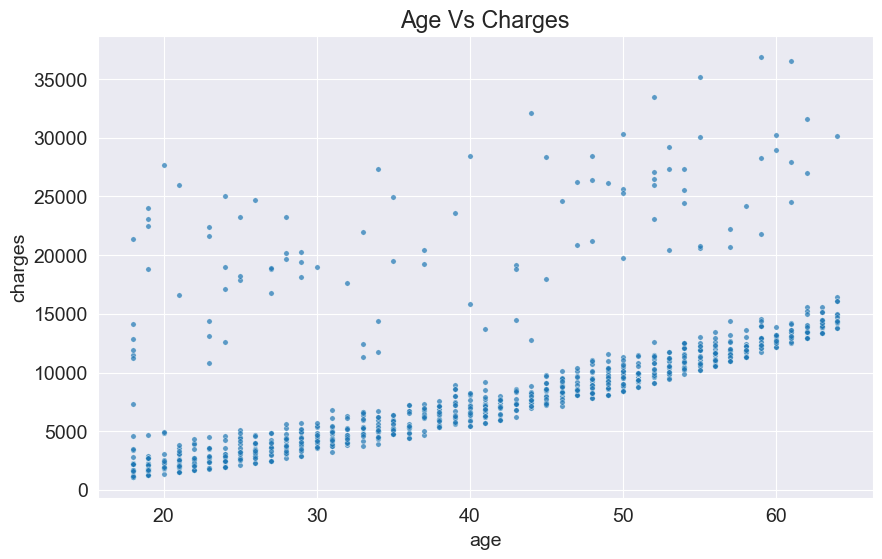

In [9]:
plt.title("Age Vs Charges")
sns.scatterplot(data = non_smoker_df, x = "age", y = "charges", alpha = 0.7, s =  15)

A line on the X and Y coordinates has the following formula.
 y = wx + b 
b - the intercept, w the slope(shows variation in y with respect to x)
 ## model ##
charges = w X age + b
We shall try and determine b and w for the line that best fits our data.
    . The technique is called linear regression, and we call the model a linear regression model.
    . The numbers w and b are called parameters or weights of the model.
    . Values in the age column are called inputs while values in the changes columns are called targets.
    


In [8]:
## defining a helper toneastimate charges / estimate charges given age, w and b
def estimate_charges (age, w, b):
    return w * age + b

In [9]:
estimate_charges (60, 80,100)

4900

In [12]:
w = 50 
b = 100

In [10]:
ages = non_smoker_df.age

In [13]:
estimated_charges = estimate_charges(ages, w, b)

In [14]:
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [13]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

plotting the estimated charges 

Text(0, 0.5, 'Estimated Charges')

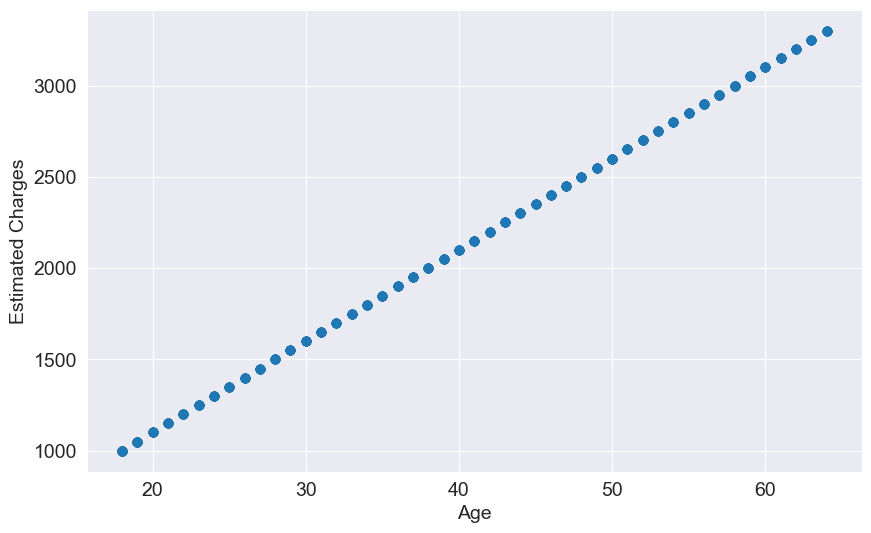

In [17]:
plt.scatter(ages, estimated_charges)
plt.xlabel("Age")
plt.ylabel("Estimated Charges")

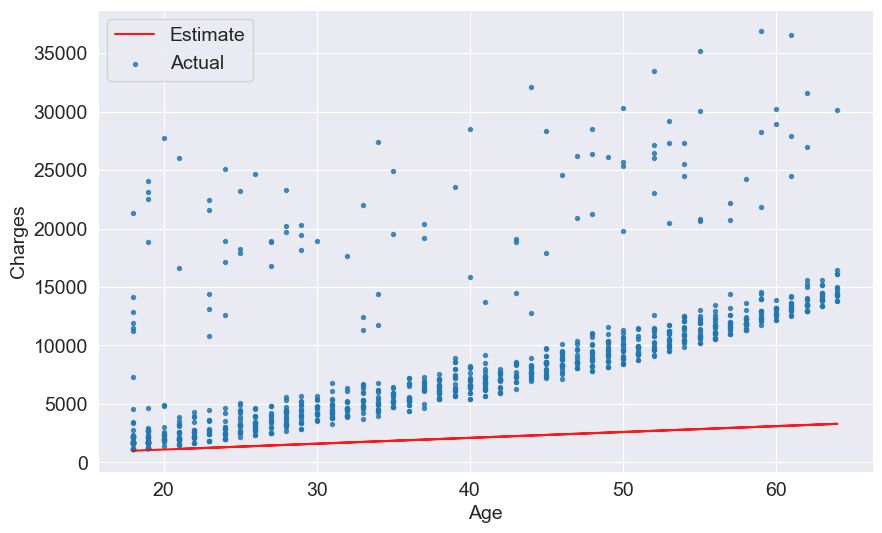

In [18]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r',  alpha = 0.9)
plt.scatter(ages, target, s = 8, alpha = 0.8)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(["Estimate", "Actual"])

Clearly, the estimates are quite poor and the line dooes not fit the data.However, we can try diffferent values of w and b to move the line around. Les define a helper function try_parameters which takes w and b as inputs and creates the above plot.

In [15]:
def try_parameters (w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges (ages, w, b)
    plt.plot(ages, estimated_charges, 'r',  alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimate", "Actual"])
        

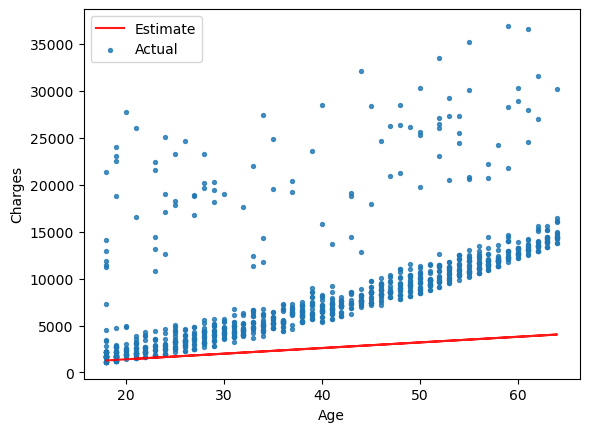

In [16]:
try_parameters(60,200)

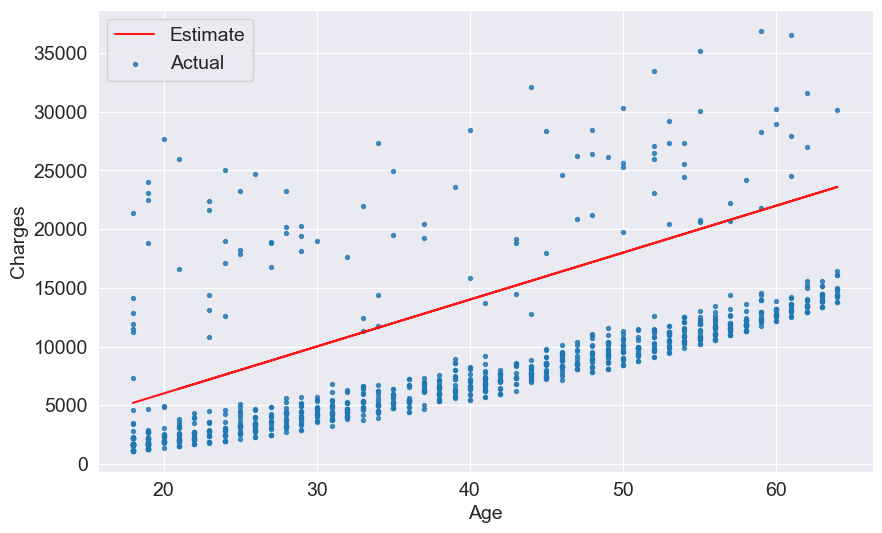

In [21]:
try_parameters(400,-2000)

As we change w and b amnually, we are trying to move the line visually closer to the ponts . We are learnIng the approximate relationship between "AGE" AND "CHARGES".

It would be nice if a computer could try several values of w and b and learn the relationship between age and charges. To do this we need to solve a couple of problems:
1.We need a way to measure numerically how well the line fits the points
2. Once the "mearsure of fit " has been computed, we mneed a way to  modify w and b to improve the fit.

if we can solve the above problems, it should be possible for a computer to determine w and b for the best fit line starting from a random guess.


## LOSS / COST Function ##
We can comparre our model's predictions with the actual targets using the following method.
. Calculate the difference between the targets and predictions("residual")
. Square all elements of difference matrix to remove negative values.
. Calculate the average of the elements in the resulting matrix.
. Take the squareroot of the result.

The result is a single number, and is known as root mean squared error(RMSE).3

In [18]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [17]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [19]:
import numpy as np

In [20]:
def rmse (targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

lets compute RMSE  for our model with a sample of set weights

In [21]:
w = 350
b = -4000


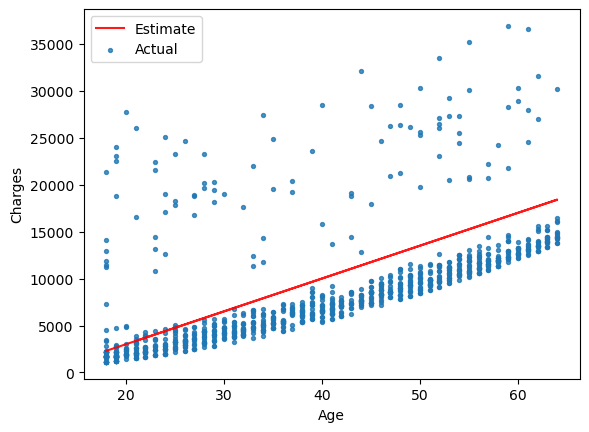

In [22]:
try_parameters (w,b)

In [23]:
targets = non_smoker_df["charges"]
predicted =estimate_charges(non_smoker_df.age,w,b)

In [24]:
rmse(targets, predicted)

4991.993804156943

We refer to the result as a loss because because it indicates the extent to which our model badly predicts the target variables. The lower the loss the better the model.

modifying the try_parameters function to also displayt loss

In [25]:
def try_parameters (W, B):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions  =estimate_charges(ages, W, B)

    #estimated_charges = estimate_charges (ages, w, b)
    plt.plot(ages, predictions, 'r',  alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimate", "Actual"])
    
    loss = rmse(targets, predictions)
    print("RSME Loss:", loss)
        

RSME Loss: 4715.1662985766


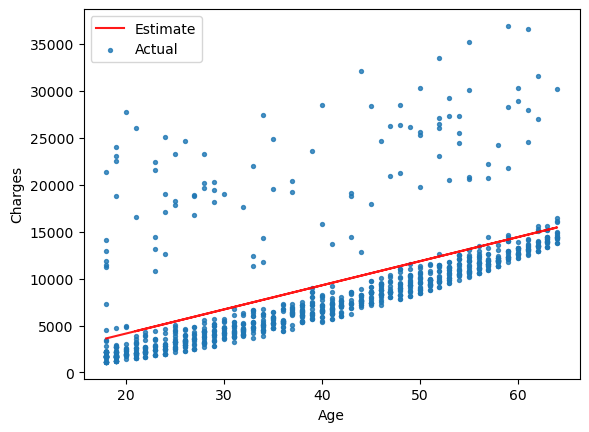

In [26]:
try_parameters(257, -1000)

## Optimizer ##
Next we need to modify weights w and b to reduce the loss and improve "fit" of the line of data.
 .Ordinary least squares(better for smaller  datasets)
 
 .Stochastic gradient descent (better for larger data sets)
 
Both of the above methods have the aim of minimizing loss, however OLS computes the best value for w and b directly.
While gradient boosting uses an iterative process byy first starting out with random values of w and b and slowly improving them using derivatives.

## Linear Regression Using Scikit-learn ##

Lets use LinearRegression class from scikit-learn to find the best "fit" line for age vs charges using the ordinary least squares optimization techniques.

In [27]:
from sklearn.linear_model import LinearRegression

First we create a new model object

In [22]:
model = LinearRegression()

Next we use .fit method to find the best line for the inputs and targets

Note that the oinputs must have a 2-d array, so we'll need to pass a dataframe instead of a single column.

In [23]:
inputs = non_smoker_df[["age"]]
target = non_smoker_df.charges
print("inputs shape:", inputs.shape)
print("targets.shape:", targets.shape)

inputs shape: (1064, 1)


NameError: name 'targets' is not defined

Lets fit the model into the data

In [78]:
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model.Lets try predicting the charges for the ages 23, 37, and 61.

In [80]:
model.predict(np.array([[23], [37], [61]]))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

Compare the values to the ones in the scatter plot and check the precision of the model
Lets next compute the predictions for the entire set of inputs

In [81]:
predictions = model.predict (inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Lets compute the RMSE loss to evaluate the model

In [82]:
rmse(targets, predictions)

4662.505766636395

See,ms like the model is off by $4000 on average which is not bad considering the presence of several outliers.

The model parrameters are in the coef_ and intercept_ properties


In [83]:
#w
model.coef_

array([267.24891283])

In [84]:
#b
model.intercept_

-2091.420556565079

RSME Loss: 4662.505766636395


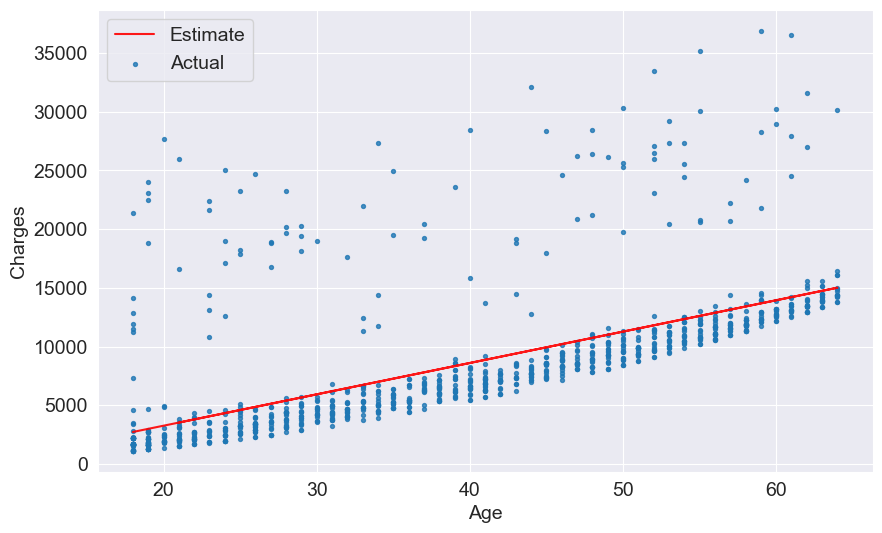

In [85]:
try_parameters(model.coef_, model.intercept_)

The line seems quite close to the points. It is slighhtly above the cluster of points, because it's also  trying to account for the outliers

## Excercise ##
Use the SGDRegressor class from scikit-learn to train a model using the stochastic gradient descent technique.Make computations and compute the loss. Is there any significant difference

In [96]:
from sklearn.linear_model  import SGDRegressor
model =  SGDRegressor()
model.fit(inputs, target)

SGDRegressor()

In [97]:
predictions = model.predict(inputs)

In [98]:
predictions

array([ 361.75543448, 4098.61042081, 5967.03791397, ...,  361.75543448,
        361.75543448, 1482.81193038])

In [99]:
model.coef_

array([373.68549863])

In [100]:
model.intercept_

array([-6364.5835409])

RSME Loss: 4897.999617198253


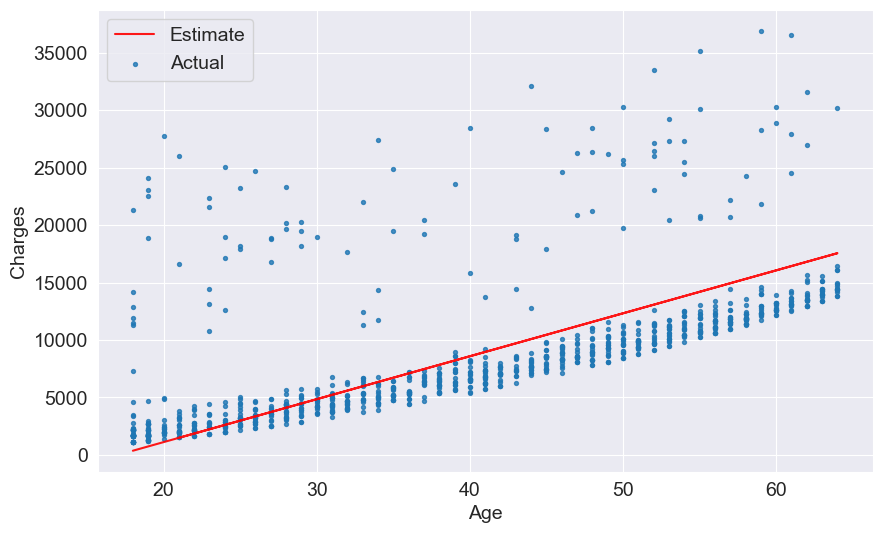

In [101]:
try_parameters(model.coef_, model.intercept_)

SGDRegressor seems to hive a slightly higher deviation and has a higher cooefficient and lower intercept.

In [103]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Ecxercise ##
Repeat the steps in this section to train a linear regression model to estimate medical charges for smokers. Visualize the targets and predictions, and copute the loss.

Lets create a dataframe for the Smokers, then define a function to estimate the charges and then build a linear regression model to predict the medical charges for smokers.

In [24]:
smoker_values = { "no" : 0, "yes" : 1}
medical_df.smoker = medical_df.smoker.map(smoker_values)

In [25]:
medical_df.head()

age     sex     bmi  children  smoker     region      charges
0   19  female  27.900         0       1  southwest  16884.92400
1   18    male  33.770         1       0  southeast   1725.55230
2   28    male  33.000         3       0  southeast   4449.46200
3   33    male  22.705         0       0  northwest  21984.47061
4   32    male  28.880         0       0  northwest   3866.85520

In [26]:
smoker_df = medical_df [medical_df.smoker == 1]

In [27]:
age = smoker_df.age

In [28]:
def estimate_charges (age, w, b):
    return w * age + b

In [29]:
def try_parameters (W, B):
    age = smoker_df.age
    target = smoker_df.charges
    predictions  =estimate_charges(age, W, B)

    #estimated_charges = estimate_charges (ages, w, b)
    plt.plot(age, predictions, 'r',  alpha = 0.9)
    plt.scatter(age, target, s = 8, alpha = 0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimate", "Actual"])
    
    loss = rmse(target, predictions)
    print("RSME Loss:", loss)

In [134]:
#linearregression is already imported

linear_model = LinearRegression()


In [135]:
inputs = smoker_df[["age"]]
target = smoker_df.charges

In [136]:
linear_model.fit(inputs, target)

LinearRegression()

In [140]:
linear_model.coef_

array([305.23760211])

In [141]:
linear_model.intercept_

20294.12812691597

In [143]:
predictions = linear_model.predict(inputs)

Lets visualize the predictions of the charges of smokers according to their age

RSME Loss: 10711.00334810241


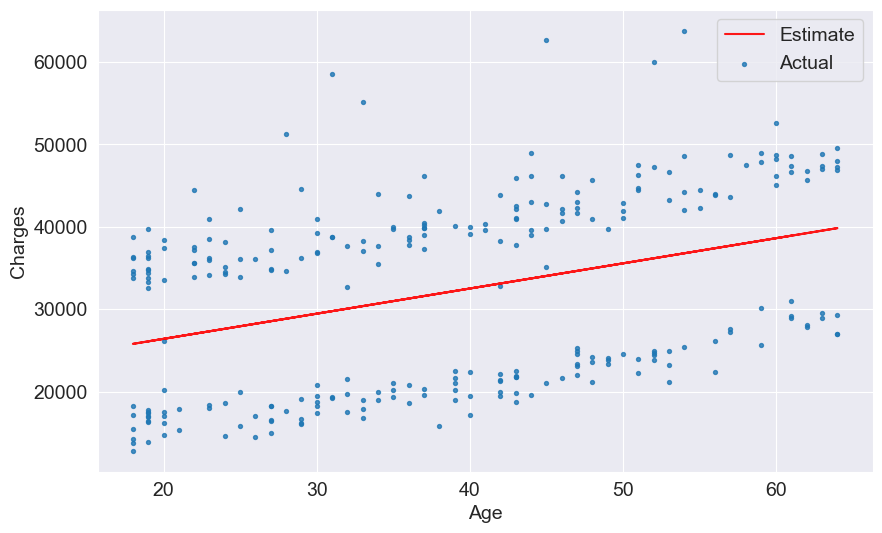

In [150]:
try_parameters(linear_model.coef_, linear_model.intercept_)

In [151]:
sgd_model = SGDRegressor()


In [152]:
sgd_model.fit(inputs, target)

SGDRegressor()

In [153]:
sgd_model.coef_

array([2.10336057e+08])

In [154]:
sgd_model.intercept_

array([-5.54529996e+09])

RSME Loss: 3882853521.606878


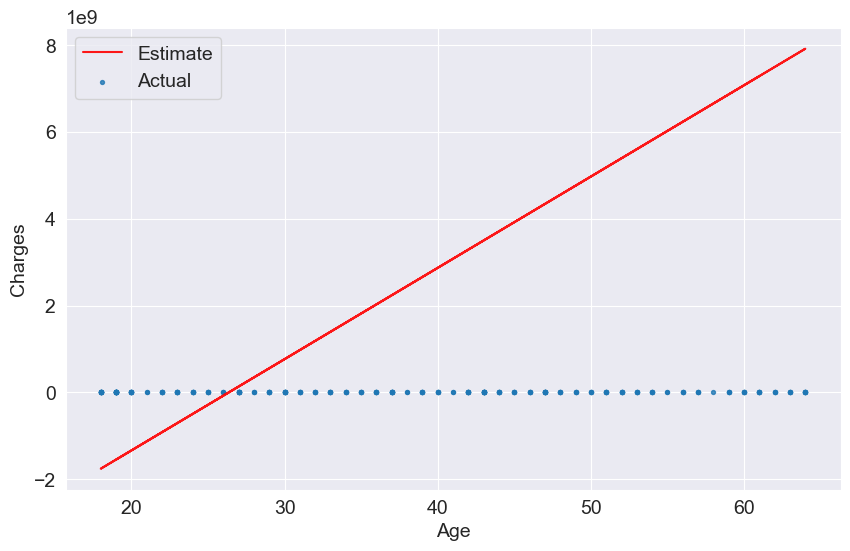

In [155]:
try_parameters(sgd_model.coef_, sgd_model.intercept_)

The ols seems to produce a better predictions for the charges compared to the SGDRegression, methodas it has a slightly lower error hence can be regarded as the most precise model. The SGDRegression seems to produce overly poor predictions.
It has a very high RMSE loss HENCE insufficient.

## Machine Learning ##
Every machine learning problem seems to have the three components: model, Cost Funnction and an optimizer(to change the model parameters).

## Linear Regression With Multiple Factors ##

So far we've used only the "age" featyre to estimate "charges", and adding other features like "bmi" is fairly straight foward. We simply assume the relationship
 charges = w1*/ age + w2 * bmi + b

We need to change just one line of code to include

In [164]:
medical_df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [28]:
non_smokers_df = medical_df[medical_df[ "smoker" ]== "no"]

In [29]:
inputs, targets = non_smokers_df [[ "age", "bmi"]], non_smoker_df["charges"]

#create and train model
model = LinearRegression().fit (inputs, targets)

#generate predictions
predictions = model.predict (inputs)

#compute loss and evaluate model
loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 4662.3128354612945


As you can see adding the bmi doesn't seem to reduce the loss by  much, as the BMI  has a very weak correlation with charges especially for non-smokers.

In [170]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833272

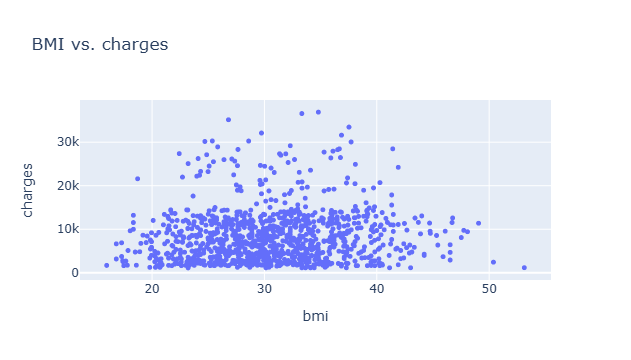

In [177]:
fig = px.scatter(non_smoker_df, x = "bmi", y = "charges", title = "BMI vs. charges")
fig.update_traces(marker_size = 5)
fig.show()

In [173]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488654)

Clearly, BMI has a much lower weightage, and you can see why. It has a tiny contribution, and even that is probably accidental. This is Important to keep in mind: you cannot find a relationship thet does not exist, nob matter what machine learnng technique or optimization technique you apply. 

## Excercise:
Train A linear regression model to estimate chrges using BMI alone. Do yoou expect it to be better or wosre than the previously trained models?



In [31]:
#DEFINITION OF THE INPUT (BMI) nad target (charges)
input = non_smoker_df[["charges"]]
target = non_smoker_df.charges
print(input.shape)
print(target.shape)

#The model
model = LinearRegression()
#fitting the model
model.fit(input, target)

#making predictions
prediction = model.predict(input)

#computiing loss and evaluating model
loss = rmse(target, prediction)
print("Loss:", loss)




(1064, 1)
(1064,)
Loss: 2.2707965187582704e-12


In [32]:
model.coef_, model.intercept_

(array([1.]), 3.637978807091713e-12)

The model shows a very weak relationship between BMI and charrges. The cofficient is 1 indicating that change in bmi has minimal impact on the charges

Lets move a step further and add children column which seems to have some correlation with charges.

Charges =  w1 * age + w2 * bmi + w3 ** children + b


In [33]:
non_smoker_df.charges .corr(non_smoker_df.children)

0.13892870453542203

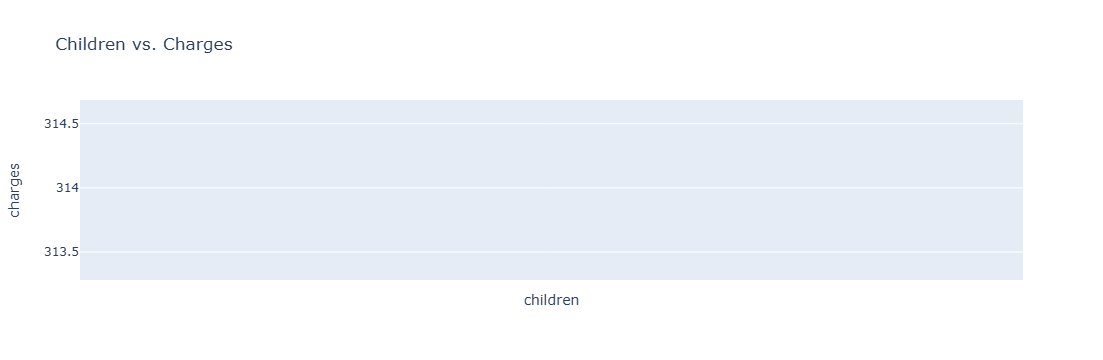

In [184]:
fig = px.strip(non_smoker_df, x = "children", y = "charges", title = "Children vs. Charges")

fig.update_traces (marker_size = 4, marker_opacity = 0.7)
fig.show()

In [34]:
#crate inputs and targets 
inputs, targets = medical_df[["age", "bmi", "children"]], medical_df ["charges"]

#create and train the model
model = LinearRegression().fit(inputs, targets)

#generate predictions
predictions = model.predict (inputs)

#computeloss to evaluate model
loss = rmse (targets, predictions)
print("Loss:", loss)



Loss: 11355.317901125973


C:\Users\USER\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



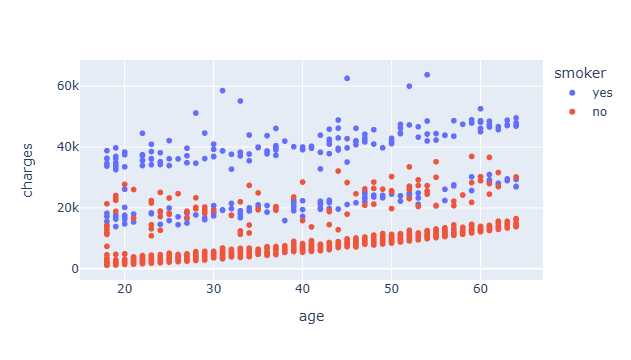

In [191]:
px.scatter (medical_df, x = "age", y = "charges", color = "smoker") 

## Using Categoriacal Features for machine learning ##
To use the categorical columns, we need to convert them into numbers.By:
 1. If a categorical column has 2 categories(iits called a binary category), then we can replace their values with 0 and 1.
 2.  If a categorical column has more than 2 categories, we can perform one-hot encoding i.e create a new column for each category with 1s and 0s.
 3.   If categories have natural order (e.g cold, neutral, warm, hot), then they can be converted to numbers (e.g 1, 2, 3, 4) preserving their order. These are called ordinals
 


## Binary categories ## 
The smoker category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".


<Axes: xlabel='smoker', ylabel='charges'>

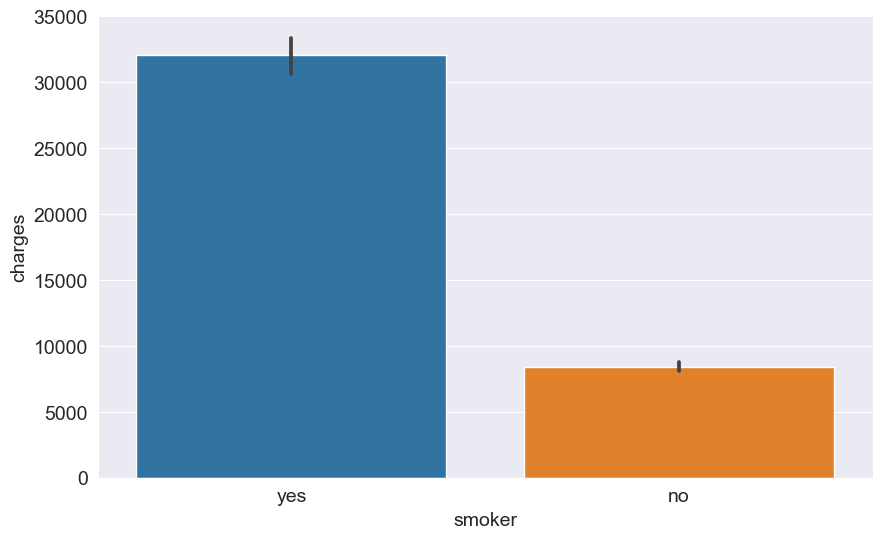

In [192]:
sns.barplot( medical_df, x = "smoker", y = "charges")

In [30]:
smoker_codes = { "no" : 0, "yes": 1}
medical_df ["smoker"] = medical_df.smoker.map(smoker_codes)

In [31]:
medical_df.charges.corr(medical_df.smoker)

0.7872514304984773

In [44]:
medical_df.head()

age     sex     bmi  children  smoker     region      charges
0   19  female  27.900         0       1  southwest  16884.92400
1   18    male  33.770         1       0  southeast   1725.55230
2   28    male  33.000         3       0  southeast   4449.46200
3   33    male  22.705         0       0  northwest  21984.47061
4   32    male  28.880         0       0  northwest   3866.85520

We can now use the smoker column for linear regression

charges = w1 * age + w2 8 bmi + w3 */ smoker + b

In [32]:
#create inputs and targets 
inputs, targets = medical_df [[ "age", "bmi", "children", "smoker"]], medical_df["charges"]

#create and train model
model = LinearRegression ().fit(inputs, targets)

#Genetrate predictions 
predictions = model.predict(inputs)

#compute loss to evaluate the model
loss = rmse(targets, predictions)

#compute loss to evaluate the model
loss = rmse (targets, predictions)
print("Loss:", loss)



Loss: 6056.439217188081


 Inclusion of the smoker column has a great impact on the loss 

# One-hot Encoding #
The "region" column contains 4 values, so we shall us one-hot encoding and create a 
column for each.


<Axes: xlabel='region', ylabel='charges'>

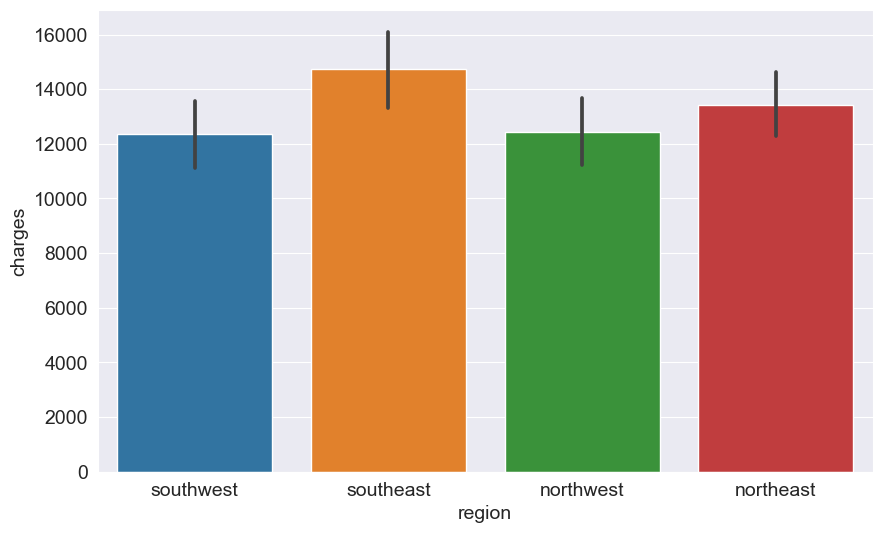

In [210]:
sns.barplot(medical_df, x = "region", y =  "charges")

In [33]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [34]:
enc.transform([["northeast"], ['northwest' ]]).toarray()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [35]:
one_hot =  enc.transform (medical_df[["region"]]).toarray()
one_hot
                          

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [36]:
medical_df [['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [37]:
medical_df

age     sex     bmi  children  smoker     region      charges  \
0      19  female  27.900         0       1  southwest  16884.92400   
1      18    male  33.770         1       0  southeast   1725.55230   
2      28    male  33.000         3       0  southeast   4449.46200   
3      33    male  22.705         0       0  northwest  21984.47061   
4      32    male  28.880         0       0  northwest   3866.85520   
...   ...     ...     ...       ...     ...        ...          ...   
1333   50    male  30.970         3       0  northwest  10600.54830   
1334   18  female  31.920         0       0  northeast   2205.98080   
1335   18  female  36.850         0       0  southeast   1629.83350   
1336   21  female  25.800         0       0  southwest   2007.94500   
1337   61  female  29.070         0       1  northwest  29141.36030   

      northeast  northwest  southeast  southwest  
0           0.0        0.0        0.0        1.0  
1           0.0        0.0        1.0        0.0  
2           0.0        0.0        1.0        0.0  
3           0.0        1.0        0.0        0.0  
4           0.0        1.0        0.0        0.0  
...         ...        ...        ...        ...  
1333        0.0        1.0        0.0        0.0  
1334        1.0        0.0        0.0        0.0  
1335        0.0        0.0        1.0        0.0  
1336        0.0        0.0        0.0        1.0  
1337        0.0        1.0        0.0        0.0  

[1338 rows x 11 columns]

Including the region columns into our predictions

charges = w1 * age + w2* bmi + w3 * charges + w4 * smoker + w5 X sex + w6* region + b



In [41]:
medical_df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [63]:
sex_code = {"female" : 1, "male":0}
medical_df["sex"] = medical_df.sex.map(sex_code)

In [64]:
medical_df.head()

age  sex     bmi  children  smoker     region      charges  northeast  \
0   19    1  27.900         0       1  southwest  16884.92400        0.0   
1   18    0  33.770         1       0  southeast   1725.55230        0.0   
2   28    0  33.000         3       0  southeast   4449.46200        0.0   
3   33    0  22.705         0       0  northwest  21984.47061        0.0   
4   32    0  28.880         0       0  northwest   3866.85520        0.0   

   northwest  southeast  southwest  sex_code  
0        0.0        0.0        1.0         1  
1        0.0        1.0        0.0         0  
2        0.0        1.0        0.0         0  
3        1.0        0.0        0.0         0  
4        1.0        0.0        0.0         0

In [82]:
#creating inputs and outputs 
input_cols = ["age", "children", "bmi", "smoker", "sex_code", "northeast", 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df [input_cols], medical_df["charges"]

#create and train the model
model = LinearRegression().fit(inputs, targets)

#generate predictions
predictions = model.predict(inputs)

#computing loss and evaluating the model
loss = rmse(targets, predictions)
print("Loss:", loss)



Loss: 6041.6796511744515


In [83]:
predictions

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

Once again thhis has leed to a slight reduction of the error

## Excercise:
Create 2 separate linear regression models, one for smokers and one for non-smokers.
Betterthan a single linear regression model? Explain whyy or why not? Try it out and see if you can justify your answer with data.

In [52]:
smokers_df = medical_df[medical_df["smoker"] == 1]
smokers_df.head()

age     sex    bmi  children  smoker     region     charges  northeast  \
0    19  female  27.90         0       1  southwest  16884.9240        0.0   
11   62  female  26.29         0       1  southeast  27808.7251        0.0   
14   27    male  42.13         0       1  southeast  39611.7577        0.0   
19   30    male  35.30         0       1  southwest  36837.4670        0.0   
23   34  female  31.92         1       1  northeast  37701.8768        1.0   

    northwest  southeast  southwest  sex_code  
0         0.0        0.0        1.0         1  
11        0.0        1.0        0.0         1  
14        0.0        1.0        0.0         0  
19        0.0        0.0        1.0         0  
23        0.0        0.0        0.0         1

In [53]:
input_cols = ["age", "children", "bmi", "smoker", "sex_code", "northeast", 'northwest', 'southeast', 'southwest']
inputs, targets = smokers_df [input_cols], smokers_df["charges"]

#create and train the model
model = LinearRegression().fit(inputs, targets)

#generate predictions
predictions = model.predict(inputs)

#computing loss and evaluating the model
loss = rmse(targets, predictions)
print("Loss:", loss)



Loss: 5668.4678821121515


Loss: 5668.4678821121515
274
274


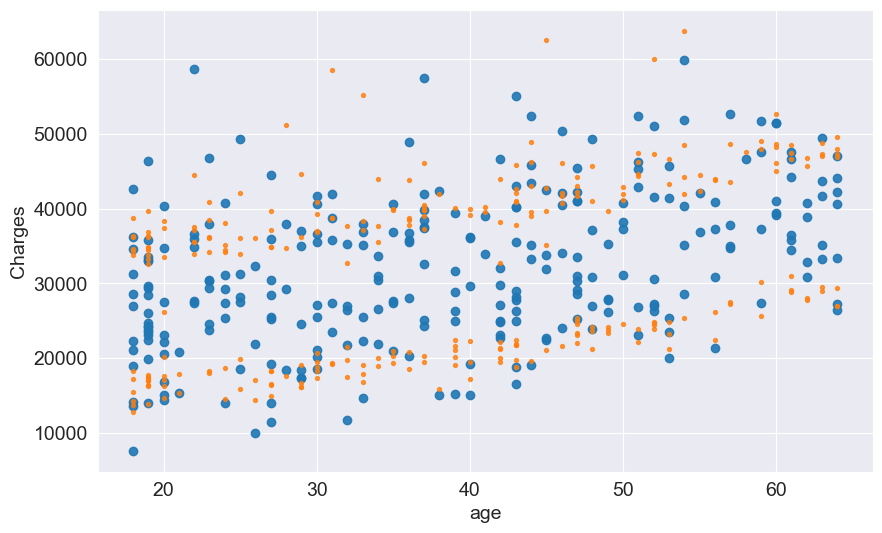

In [59]:
print("Loss:", loss)
print(len(targets))
print(len(predictions))
plt.scatter(age, predictions, alpha = 0.9)
plt.scatter(age, targets, s = 8, alpha = 0.8)
plt.xlabel("age")
plt.ylabel("Charges")
#plt.legend(["Estimate", "Actual"])
plt.show()

In [57]:
non_smokers_df = medical_df[medical_df ["smoker"] == -0]
non_smokers_df.head()


age     sex     bmi  children  smoker     region      charges  northeast  \
1   18    male  33.770         1       0  southeast   1725.55230        0.0   
2   28    male  33.000         3       0  southeast   4449.46200        0.0   
3   33    male  22.705         0       0  northwest  21984.47061        0.0   
4   32    male  28.880         0       0  northwest   3866.85520        0.0   
5   31  female  25.740         0       0  southeast   3756.62160        0.0   

   northwest  southeast  southwest  sex_code  
1        0.0        1.0        0.0         0  
2        0.0        1.0        0.0         0  
3        1.0        0.0        0.0         0  
4        1.0        0.0        0.0         0  
5        0.0        1.0        0.0         1

In [245]:
input_cols = ["age", "children", "bmi", "smoker", "sex_code", "northeast", 'northwest', 'southeast', 'southwest']
inputs, targets = non_smokers_df [input_cols], non_smokers_df["charges"]

#create and train the model
model = LinearRegression().fit(inputs, targets)

#generate predictions
predictions = model.predict(inputs)

#computing loss and evaluating the model
loss = rmse(targets, predictions)
print("Loss:", loss)


Loss: 4573.074988795492


Loss: 4573.074988795492


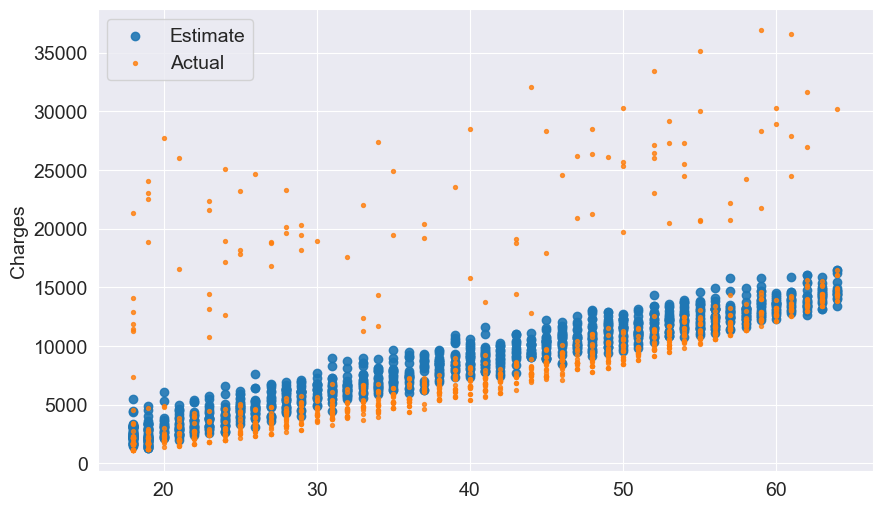

In [251]:
print("Loss:", loss)
plt.scatter(ages, predictions, alpha = 0.9)
plt.scatter(ages, targets, s = 8, alpha = 0.8)
plt.xlabel("")
plt.ylabel("Charges")
plt.legend(["Estimate", "Actual"])
plt.show()
    

## Model Improvements ##
1. Feature scaling
   To compare the importance of each feature in our model, we can compare their weights first.


In [40]:
medical_df[input_cols].iloc[10]

age          25.00
children      0.00
bmi          26.22
smoker        0.00
sex_code      0.00
northeast     1.00
northwest     0.00
southeast     0.00
southwest     0.00
Name: 10, dtype: float64

In [41]:
model.predict([[28, 30, 2, 1, 0, 0, 1, 0, 0]])

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33561.09883967])

In [42]:
model.coef_

array([  256.85635254,   475.50054515,   339.19345361, 23848.53454191,
         131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [69]:
coef_df = pd.DataFrame(data = model.coef_, index= input_cols,  columns = ["coef"])

In [70]:
coef_df

coef
age          256.856353
children     475.500545
bmi          339.193454
smoker     23848.534542
sex_code     131.314359
northeast    587.009235
northwest    234.045336
southeast   -448.012814
southwest   -373.041756

In [43]:
weights_df = pd.DataFrame ({"feature" : np.append(input_cols, 1),
                            "weight" : np.append(model.coef_, model.intercept_)})
weights_df
                        
                

feature        weight
0        age    256.856353
1   children    475.500545
2        bmi    339.193454
3     smoker  23848.534542
4   sex_code    131.314359
5  northeast    587.009235
6  northwest    234.045336
7  southeast   -448.012814
8  southwest   -373.041756
9          1 -12656.862171

The weights might not fully represent the importance of each feature because the ranges of each features are different.
While it seems  BMI nad the northeast have a higher weight than age, keep in minf that the range of values for BMI is limited (15 TO 40) and the northeast column only takes values 0 and 1.

Due to diff columns having different ranges, we run into issues.
 1. We can't compare the weights of different columns to identify which features are important.
 2.  A column with a larger range of inputs may disproportionally affect the loss and dominate the optimization process.

For this reason, its common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.
We can use standard scaler in scikit-learn

In [45]:
from sklearn.preprocessing import StandardScaler

In [65]:
numeric_cols = ["age", "bmi", "children"]
scaler = StandardScaler()

In [66]:
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [67]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [68]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [69]:
medical_df[numeric_cols]

age     bmi  children
0      19  27.900         0
1      18  33.770         1
2      28  33.000         3
3      33  22.705         0
4      32  28.880         0
...   ...     ...       ...
1333   50  30.970         3
1334   18  31.920         0
1335   18  36.850         0
1336   21  25.800         0
1337   61  29.070         0

[1338 rows x 3 columns]

Lets SScale the data as follows

In [70]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])

In [78]:
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [72]:
cat_cols = ["smoker", "sex_code", "northeast", "northwest", "southeast", "southwest"]
categorical_data = medical_df [cat_cols].values
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [73]:
medical_df.head()

age  sex     bmi  children  smoker     region      charges  northeast  \
0   19    1  27.900         0       1  southwest  16884.92400        0.0   
1   18    0  33.770         1       0  southeast   1725.55230        0.0   
2   28    0  33.000         3       0  southeast   4449.46200        0.0   
3   33    0  22.705         0       0  northwest  21984.47061        0.0   
4   32    0  28.880         0       0  northwest   3866.85520        0.0   

   northwest  southeast  southwest  sex_code  
0        0.0        0.0        1.0         1  
1        0.0        1.0        0.0         0  
2        0.0        1.0        0.0         0  
3        1.0        0.0        0.0         0  
4        1.0        0.0        0.0         0

In [94]:


#scaled_inputs = scaler.transform(medical_df[numeric_cols])
#cat_cols = ["smoker", "sex", "northeast", "northwest", "southeast", "southwest"]
#categorical_data = medical_df [cat_cols].values







Input = np.concatenate((scaled_inputs, categorical_data), axis = 1)
Targets = medical_df.charges

#scaled_inputs = scaler.transform(medical_df[numeric_cols])

#create and train the model
model1 = LinearRegression().fit(Input, Targets)

#generate predictions
predictions = model1.predict(Input)

#compute loss and evaluate model
loss = rmse(Targets, predictions)
print("loss:", loss)

loss: 6041.6796511744515


In [95]:
Input

array([[-1.43876426, -0.45332   , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.        ,
         0.        ,  0.        ]])

In [97]:
model1.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
         131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [87]:
model.intercept_

8335.168856016728

In [88]:
weights_df = pd.DataFrame ({"feature" : np.append(numeric_cols + cat_cols, 1),
                            "weight" : np.append(model.coef_, model.intercept_)})
weights_df

feature        weight
0        age   3607.472736
1        bmi   2067.691966
2   children    572.998210
3     smoker  23848.534542
4   sex_code    131.314359
5  northeast    587.009235
6  northwest    234.045336
7  southeast   -448.012814
8  southwest   -373.041756
9          1   8335.168856

In [81]:
predictions

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

In [1]:
import numpy as np

In [2]:
def rmse (targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [3]:
import pandas as pd
medical_df = pd.read_csv("Downloads/insurance.csv")
medical_df.head()

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()

enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[["region"]])
one_hot =  enc.transform (medical_df[["region"]]).toarray()
enc.categories_

sex_code = {"female": 1, "male": 0}
medical_df["sex"] = medical_df.sex.map(sex_code)

smoker_code = {"yes" : 1, "no": 0}
medical_df["smoker"] = medical_df.smoker.map(smoker_code)
               
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[["region"]])
enc.categories_

one_hot =  enc.transform (medical_df[["region"]]).toarray()
medical_df [['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

from sklearn.preprocessing import StandardScaler
numeric_cols = ["age", "bmi", "children"]
scaler.fit(medical_df[numeric_cols])
scaled_inputs = scaler.transform(medical_df[numeric_cols])



cat_cols = ["smoker", "sex", "northeast", "northwest", "southeast", "southwest"]
categorical_data = medical_df [cat_cols].values


X = np.concatenate((scaled_inputs, categorical_data), axis = 1)
y = medical_df["charges"]


#create and train the model
model1 = LinearRegression().fit(X, y)
predictions = model1.predict(X)

#compute loss and evaluate model
loss = rmse(y, predictions)
print("loss:", loss)

                          

loss: 6041.6796511744515


In [4]:
#making a sample prediction
new_customers = [[28, 30, 2, 1, 0, 0, 1, 0, 0.]]

In [5]:
scaler.transform ([[ 28, 30, 2]])

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.79795355, -0.10882659,  0.75107928]])

In [7]:
model1.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0.]])

array([29744.50027431])

So far we can conclude that age, bmi amd smoker are the most important features

## How to approach a machine learning problem ##
1. Explore dta and find correlations between inputs and targets.
2.  Pick the right model, loss functions and optimize for the problem at hand.
3.  Scale numeric variables and one hot encode categorical data
4.  Set aside a test set (using a fraction of the trainimg set).
5.  Train the model
6.  Make predictions on the test and compute the loss.

## Creating a test set ##
Most models like the one we have created are designed to be used in realworld.Its common practice to set aside a small fraction of the data (e.g 10%) just for testind and reportig results of the model.



In [8]:
from sklearn.model_selection import train_test_split

In [10]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split (X, y, test_size = 0.20, random_state = 101)

In [11]:
model1.fit(inputs_train, targets_train)

LinearRegression()

In [15]:
predictions = model1.predict(inputs_test)

In [20]:
df_coef = pd.DataFrame(data = model1.coef_,
                       index  = [["age", "bmi", "children", "smoker", "sex", "northeast", "northwest", "southeast", "southwest"]],
                       columns = ["coef"])
df_coef

coef
age         3434.023836
bmi         2224.708683
children     497.683703
smoker     23655.837965
sex         -108.743846
northeast    424.392856
northwest    525.225009
southeast   -489.503468
southwest   -460.114397

In [21]:
loss = rmse(targets_test, predictions)
print("Loss:", loss)

Loss: 5809.33674102267
